# Nuitées mensuelles -> par 6 mois
Lecture de données de l’OFS et regroupement par date.

Source: https://www.pxweb.bfs.admin.ch/pxweb/fr/px-x-1003020000_103/px-x-1003020000_103/px-x-1003020000_103.px

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import dateparser
from math import nan
plt.style.use('fivethirtyeight')

In [16]:
df = pd.read_csv('px-x-1003020000_103.csv', encoding='latin-1', sep=';', skiprows=1)

In [17]:
df['timestamp'] = df.apply(lambda row: dateparser.parse("{} {}".format(row['Mois'], row['Année'])), axis=1)

In [18]:
df.index = pd.to_datetime(df['timestamp'])

In [19]:
# données mai-déc 2019 vides
df = df[:'2019-05-04'].copy()

In [20]:
for col in df.columns[3:-1]:
    df[col] = df[col].apply(lambda x: int(x) if x != '...' else nan)

In [21]:
df.columns

Index(['Année', 'Mois', 'Région touristique', 'Suisse Nuitées',
       'Pays baltes Nuitées', 'Allemagne Nuitées', 'France Nuitées',
       'Italie Nuitées', 'Autriche Nuitées', 'Royaume-Uni Nuitées',
       'Irlande (Eire) Nuitées', 'Pays-Bas Nuitées', 'Belgique Nuitées',
       'Luxembourg Nuitées', 'Danemark Nuitées', 'Suède Nuitées',
       'Norvège Nuitées', 'Finlande Nuitées', 'Espagne Nuitées',
       'Portugal Nuitées', 'Grèce Nuitées', 'Turquie Nuitées',
       'Autres Europe Nuitées', 'Liechtenstein Nuitées', 'Islande Nuitées',
       'Pologne Nuitées', 'Hongrie Nuitées', 'Biélorussie Nuitées',
       'Bulgarie Nuitées', 'Malte Nuitées', 'Chypre Nuitées', 'Chili Nuitées',
       'Etats-Unis d'Amérique Nuitées', 'Canada Nuitées', 'Mexique Nuitées',
       'Brésil Nuitées', 'Argentine Nuitées',
       'Amérique Centrale, Caraïbes Nuitées', 'Autres Amérique du Sud Nuitées',
       'Autres Amérique centrale, Caraïbes Nuitées', 'Egypte Nuitées',
       'Autres Afrique du Nord Nuit

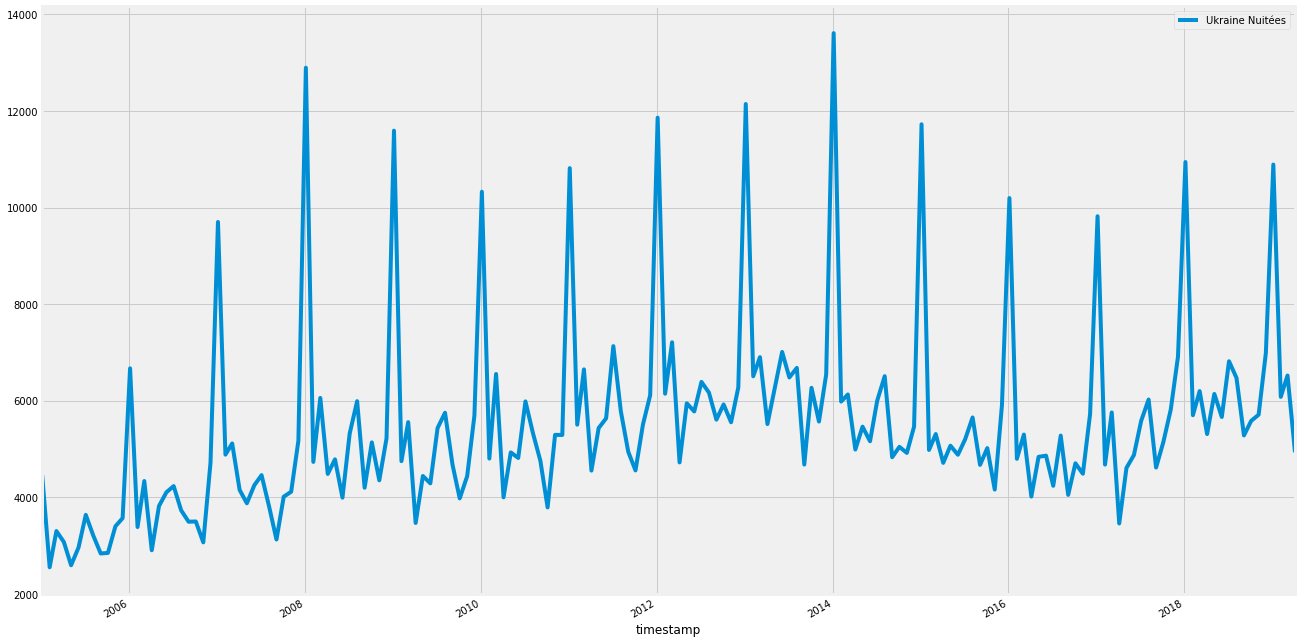

In [22]:
df[['Ukraine Nuitées']].plot(figsize=(20, 12))

In [23]:
mois_hiver = ['Novembre', 'Décembre', 'Janvier', 'Février', 'Mars', 'Avril']

In [24]:
df = df[df['Mois'].isin(mois_hiver)].copy()

In [25]:
def getSeason(row):
    if row['timestamp'].month < 6:
        return "Hiver {}-{}".format(row['Année']-1, row['Année'])
    else:
        return "Hiver {}-{}".format(row['Année'], row['Année']+1)
df['Saison'] = df.apply(getSeason, axis=1)

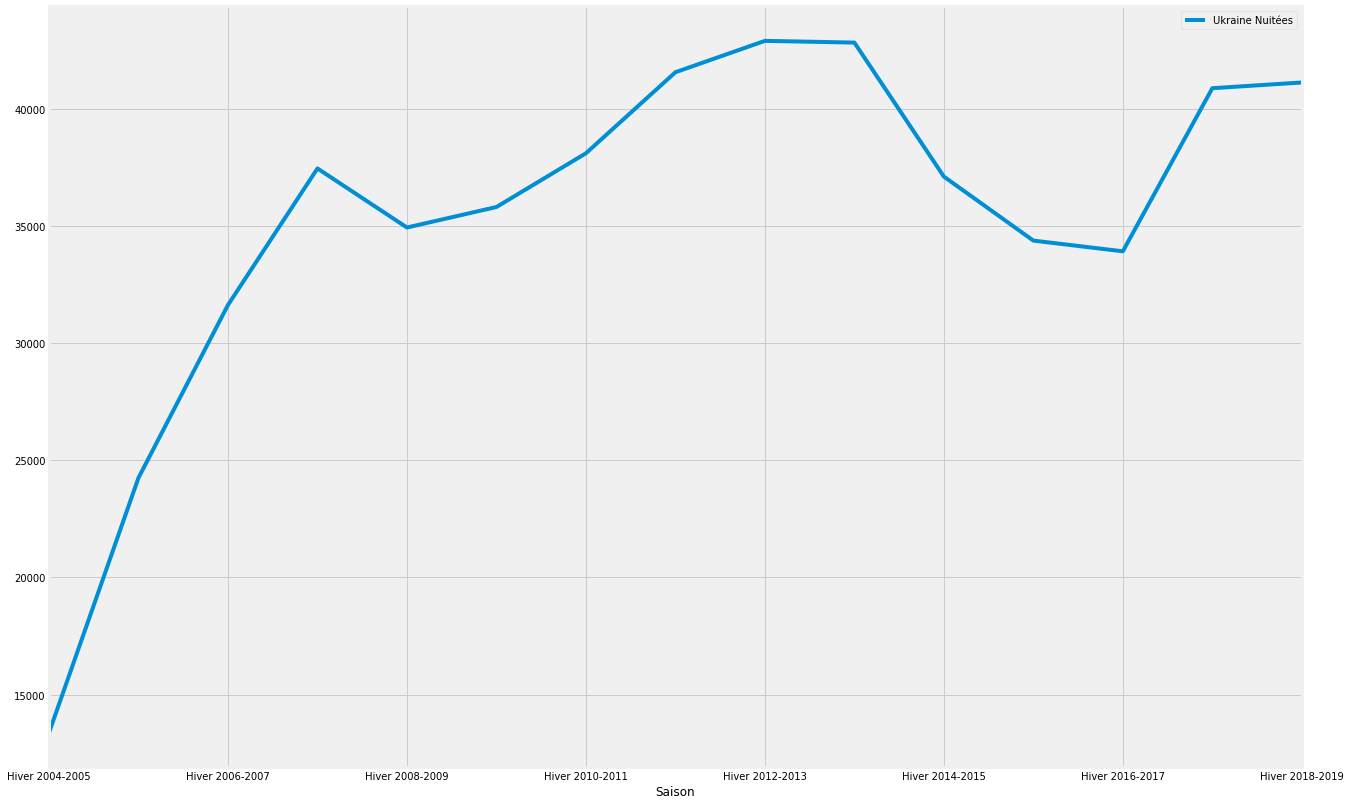

In [26]:
df.groupby('Saison')[['Ukraine Nuitées']].sum().plot(figsize=(20, 14))

In [27]:
# on enleve l'hiver 2004 (qu'on n'a qu'à moitié)
df = df[df['Saison'] != 'Hiver 2004-2005'].copy()

In [28]:
df.columns = [i.replace(' Nuitées', '').replace("Etats-Unis d'Amérique", 'Etats-Unis') for i in df.columns]

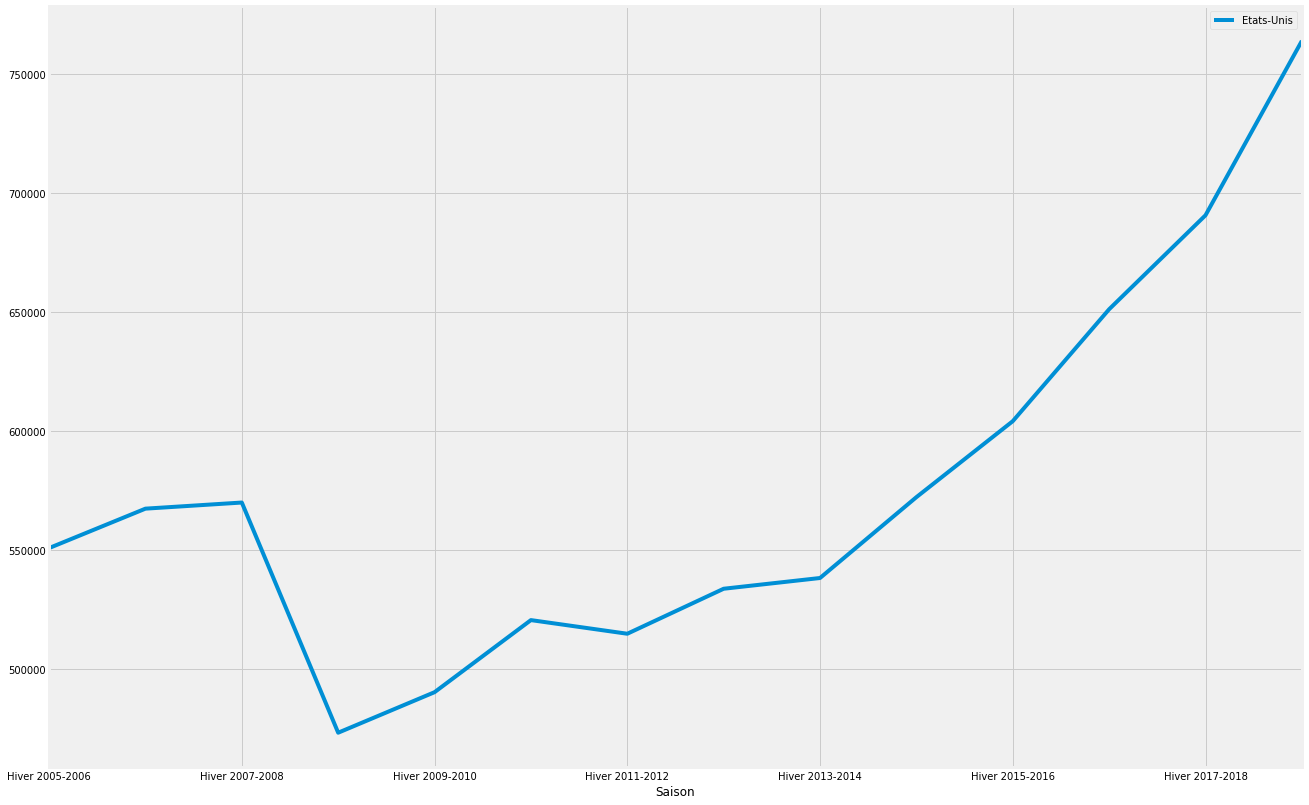

In [29]:
df.groupby('Saison')[['Etats-Unis']].sum().plot(figsize=(20, 14))

In [30]:
pd.DataFrame(df.groupby('Saison')[['Etats-Unis']].sum()).to_excel('check-sommes.xls')

In [33]:
[i for i in df.columns if i.find('Chine') >= 0]

['Chine (sans Hongkong)', 'Chine (Taiwan)']

In [35]:
dfn = df.groupby('Saison')[['Etats-Unis', 'Italie', 'France', 'Allemagne', 'Royaume-Uni', 'Chine (sans Hongkong)']].sum()

In [36]:
dfn.columns = ['Etats-Unis', 'Italie', 'France',
       'Allemagne', 'Royaume-Uni',
       'Chine']

In [38]:
# depuis 2009-2010
dfn[4:]

,Etats-Unis,Italie,France,Allemagne,Royaume-Uni,Chine
Saison,,,,,,
Hiver 2009-2010,490270,537275,703549,2698586,910708,127844
Hiver 2010-2011,520553,497643,701925,2501930,846900,163553
Hiver 2011-2012,514825,459027,673165,2125592,759656,223828
Hiver 2012-2013,533728,463350,667254,2091278,763738,262913
Hiver 2013-2014,538242,483024,684276,2033352,794861,309871
Hiver 2014-2015,572210,473343,640490,1915438,788402,398548
Hiver 2015-2016,604128,467485,618400,1726669,801418,370255
Hiver 2016-2017,651155,440732,604652,1707384,764406,402833
Hiver 2017-2018,690645,458043,627680,1780699,792426,436327


In [39]:
# export pour c3js
for col in dfn[4:].columns:
    row = [col]
    row.extend(dfn[col].values)
    print("{},".format(row))

['Etats-Unis', 550816, 567378, 569948, 473244, 490270, 520553, 514825, 533728, 538242, 572210, 604128, 651155, 690645, 763922],
['Italie', 492908, 532943, 570721, 529785, 537275, 497643, 459027, 463350, 483024, 473343, 467485, 440732, 458043, 455465],
['France', 629773, 669553, 703962, 683229, 703549, 701925, 673165, 667254, 684276, 640490, 618400, 604652, 627680, 636851],
['Allemagne', 2581205, 2685848, 2870556, 2772313, 2698586, 2501930, 2125592, 2091278, 2033352, 1915438, 1726669, 1707384, 1780699, 1776752],
['Royaume-Uni', 1069993, 1104554, 1191701, 964080, 910708, 846900, 759656, 763738, 794861, 788402, 801418, 764406, 792426, 777080],
['Chine', 70719, 86659, 97049, 98540, 127844, 163553, 223828, 262913, 309871, 398548, 370255, 402833, 436327, 448899],
